<a href="https://colab.research.google.com/github/brucker3/KDM_spring2021/blob/main/ICP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all the libraries 
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Readind the files as a pandas dataframe 

In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/data/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


converting the data frame to text

In [5]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

Breaking the text into sentences 

In [6]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.]', 'Index: []']


Breaking the text into words 

In [7]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75


finding the frequencies distribution

In [8]:
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 56 samples and 75 outcomes>


Finding the two most common words  

In [9]:
fdist.most_common(2)

[('.', 5), ('on', 4)]

Plot of the frequencies distribution

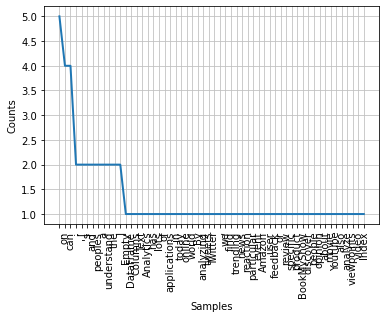

In [10]:
v=fdist.plot(75,cumulative=False)
plt.show()

IPD-1 analysis 1 
frequency distribution after removing stop words 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


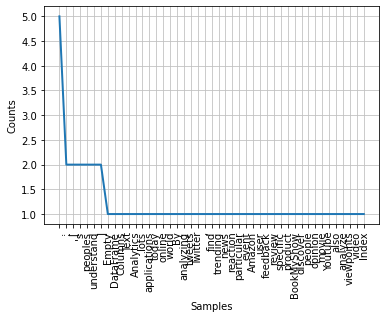

<FreqDist with 45 samples and 55 outcomes>


In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
clean_token = tokenized_word
for token in tokenized_word:

    if token in stopwords:

        tokenized_word.remove(token)

fdist = FreqDist(tokenized_word)
v=fdist.plot(55,cumulative=False)
plt.show()
print(fdist)


ICP-1 anaylsis 2 frequeny distribuiton on lenght of words 

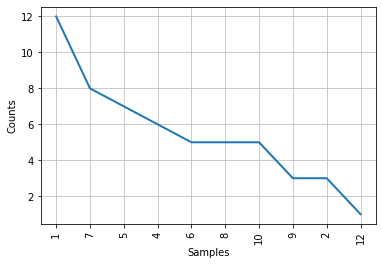

In [37]:
wordlen_count_list = []
for token in tokenized_word:
    wordlen = len(token)
    wordlen_count_list.append(wordlen)

fdist = FreqDist(wordlen_count_list)
v=fdist.plot(55,cumulative=False)
plt.show()

ICP -1 anaylsis 3  word clound of text 

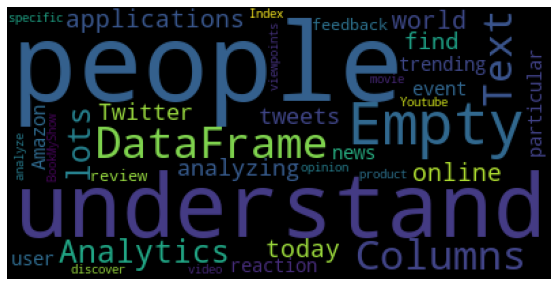

In [66]:
from wordcloud import WordCloud, STOPWORDS
wordclound = WordCloud(stopwords= STOPWORDS, max_words= 100).generate(text)
plt.figure(figsize=(15, 5))
plt.clf()
plt.imshow(wordclound)
plt.axis("off")
plt.show()
